In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [73]:
train_df=pd.read_csv("train.csv", parse_dates=['Date'])
test_df=pd.read_csv("test.csv", parse_dates=['Date'])
store_df=pd.read_csv("store.csv")


In [ ]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2013-01-01,12302,1102,1,0,0,0
1,1,3,2013-01-02,6496,790,1,0,0,0
2,1,4,2013-01-03,21287,1873,1,1,0,0
3,1,5,2013-01-04,12551,1205,1,0,0,0
4,1,6,2013-01-05,8783,869,1,0,0,0


In [ ]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,6,2015-08-01,1,0,0,0
1,2,1,7,2015-08-02,0,0,0,0
2,3,1,1,2015-08-03,1,0,0,0
3,4,1,2,2015-08-04,1,0,0,0
4,5,1,3,2015-08-05,1,0,0,0


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval
0,1,a,a,2170.465839,6.0,2000.0,1,2014.0,51.0,"Jan,Apr,Jul,Oct"
1,2,a,a,727.245036,NaN,NaN,1,2015.0,12.0,"Jan,Apr,Jul,Oct"
2,3,d,c,3115.205782,5.0,1998.0,1,2012.0,21.0,"Mar,Jun,Sept,Dec"
3,4,a,b,854.124251,9.0,1991.0,0,2015.0,37.0,NaN
4,5,a,a,680.516577,4.0,1990.0,0,2011.0,52.0,NaN


In [72]:
print("training Data Info:")
print(train_df.info())
print("test Data Info:")
print(test_df.info())
print("store Data Info:")
print(store_df.info())

training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050330 entries, 0 to 1050329
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1050330 non-null  int64         
 1   DayOfWeek      1050330 non-null  int64         
 2   Date           1050330 non-null  datetime64[ns]
 3   Sales          1050330 non-null  int64         
 4   Customers      1050330 non-null  int64         
 5   Open           1050330 non-null  int64         
 6   Promo          1050330 non-null  int64         
 7   StateHoliday   1050330 non-null  object        
 8   SchoolHoliday  1050330 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 72.1+ MB
None
test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53520 entries, 0 to 53519
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         -------------- 

In [71]:
print("training Data shape:")
print(train_df.shape)
print("test Data shape:")
print(test_df.shape)
print("store Data shape:")
print(store_df.shape)

training Data shape:
(1050330, 9)
test Data shape:
(53520, 8)
store Data shape:
(1115, 10)


In [ ]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.050330e+06,1.050330e+06,1.050330e+06,1.050330e+06,1.050330e+06,1.050330e+06,1.050330e+06
mean,5.580000e+02,3.997877e+00,9.743868e+03,6.861922e+02,8.386907e-01,2.195434e-01,1.316348e-01
std,3.218728e+02,1.997344e+00,8.425877e+03,5.083542e+02,3.678162e-01,4.139375e-01,3.380935e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.790000e+02,2.000000e+00,3.295000e+03,2.720000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,8.044000e+03,6.480000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.370000e+02,6.000000e+00,1.441800e+04,1.047000e+03,1.000000e+00,0.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,7.643100e+04,3.799000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceYear,Promo2SinceWeek
count,1115.00000,1006.000000,924.000000,924.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,2109.013025,6.594156,2002.700216,0.541704,2012.509417,25.673543
std,322.01708,1971.455319,3.495983,7.558365,0.498481,1.713462,15.397929
min,1.00000,33.566597,1.000000,1990.000000,0.000000,2010.000000,1.000000
25%,279.50000,873.018208,4.000000,1996.000000,0.000000,2011.000000,12.000000
50%,558.00000,1503.928031,7.000000,2003.000000,1.000000,2013.000000,25.000000
75%,836.50000,2663.106214,10.000000,2009.000000,1.000000,2014.000000,39.500000
max,1115.00000,19382.305961,12.000000,2015.000000,1.000000,2015.000000,52.000000


In [ ]:

print('Train range:', train_df['Date'].min(), '→', train_df['Date'].max())
print('Test  range:',  test_df['Date'].min(),  '→', test_df['Date'].max())

Train range: 2013-01-01 00:00:00 → 2015-07-31 00:00:00
Test  range: 2015-08-01 00:00:00 → 2015-09-17 00:00:00


In [ ]:
 

df = train_df.merge(store_df, on='Store', how='left')
test_full = test_df.merge(store_df, on='Store', how='left')

In [16]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval
0,1,2,2013-01-01,12302,1102,1,0,0,0,a,a,2170.465839,6.0,2000.0,1,2014.0,51.0,"Jan,Apr,Jul,Oct"
1,1,3,2013-01-02,6496,790,1,0,0,0,a,a,2170.465839,6.0,2000.0,1,2014.0,51.0,"Jan,Apr,Jul,Oct"
2,1,4,2013-01-03,21287,1873,1,1,0,0,a,a,2170.465839,6.0,2000.0,1,2014.0,51.0,"Jan,Apr,Jul,Oct"
3,1,5,2013-01-04,12551,1205,1,0,0,0,a,a,2170.465839,6.0,2000.0,1,2014.0,51.0,"Jan,Apr,Jul,Oct"
4,1,6,2013-01-05,8783,869,1,0,0,0,a,a,2170.465839,6.0,2000.0,1,2014.0,51.0,"Jan,Apr,Jul,Oct"


In [17]:
test_full.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval
0,1,1,6,2015-08-01,1,0,0,0,a,a,2170.465839,6.0,2000.0,1,2014.0,51.0,"Jan,Apr,Jul,Oct"
1,2,1,7,2015-08-02,0,0,0,0,a,a,2170.465839,6.0,2000.0,1,2014.0,51.0,"Jan,Apr,Jul,Oct"
2,3,1,1,2015-08-03,1,0,0,0,a,a,2170.465839,6.0,2000.0,1,2014.0,51.0,"Jan,Apr,Jul,Oct"
3,4,1,2,2015-08-04,1,0,0,0,a,a,2170.465839,6.0,2000.0,1,2014.0,51.0,"Jan,Apr,Jul,Oct"
4,5,1,3,2015-08-05,1,0,0,0,a,a,2170.465839,6.0,2000.0,1,2014.0,51.0,"Jan,Apr,Jul,Oct"


In [32]:
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceYear              0
Promo2SinceWeek              0
PromoInterval                0
dtype: int64

In [33]:
test_full.isnull().sum()

Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceYear              0
Promo2SinceWeek              0
PromoInterval                0
dtype: int64

In [30]:

num_impute_cols = [
    "CompetitionDistance",
    "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear",
    "Promo2SinceWeek", "Promo2SinceYear"
]
for c in num_impute_cols:
    med = df[c].median(skipna=True)
    df[c] = df[c].fillna(med)
    test_full[c] = test_full[c].fillna(med)


In [31]:

cat_cols = ["StoreType", "Assortment", "StateHoliday", "PromoInterval"]
for c in cat_cols:
    df[c] = df[c].fillna("None")
    test_full[c] = test_full[c].fillna("None")


In [ ]:
# If a store does not participate in Promo (Promo == 0), then related fields must be turned off:

def fix_promo2_block(frame):
    mask = (frame["Promo2"] == 0)
    frame.loc[mask, "Promo2SinceWeek"] = 0
    frame.loc[mask, "Promo2SinceYear"] = 0
    frame.loc[mask, "PromoInterval"]   = "None"
    return frame

df = fix_promo2_block(df)
test_full = fix_promo2_block(test_full)


In [41]:

cat_cols = ["StoreType", "Assortment", "StateHoliday", "PromoInterval"]
df = pd.get_dummies(df, columns=cat_cols, drop_first=False)
test_full = pd.get_dummies(test_full, columns=cat_cols, drop_first=False)

In [ ]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None,Year,Month,Day
0,1,2,2013-01-01,12302,1102,1,0,0,2170.465839,6.0,...,False,False,False,False,True,False,False,2013,1,1
1,1,3,2013-01-02,6496,790,1,0,0,2170.465839,6.0,...,False,False,False,False,True,False,False,2013,1,2
2,1,4,2013-01-03,21287,1873,1,1,0,2170.465839,6.0,...,False,False,False,False,True,False,False,2013,1,3
3,1,5,2013-01-04,12551,1205,1,0,0,2170.465839,6.0,...,False,False,False,False,True,False,False,2013,1,4
4,1,6,2013-01-05,8783,869,1,0,0,2170.465839,6.0,...,False,False,False,False,True,False,False,2013,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050325,1115,1,2015-07-27,3726,240,1,0,0,2011.874320,3.0,...,False,False,False,False,False,False,True,2015,7,27
1050326,1115,2,2015-07-28,5923,337,1,0,0,2011.874320,3.0,...,False,False,False,False,False,False,True,2015,7,28
1050327,1115,3,2015-07-29,4673,295,1,1,0,2011.874320,3.0,...,False,False,False,False,False,False,True,2015,7,29
1050328,1115,4,2015-07-30,4513,263,1,0,0,2011.874320,3.0,...,False,False,False,False,False,False,True,2015,7,30


In [45]:
test_full

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Assortment_b,Assortment_c,StateHoliday_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None,Year,Month,Day
0,1,1,6,2015-08-01,1,0,0,2170.465839,6.0,2000.0,...,False,False,True,False,True,False,False,2015,8,1
1,2,1,7,2015-08-02,0,0,0,2170.465839,6.0,2000.0,...,False,False,True,False,True,False,False,2015,8,2
2,3,1,1,2015-08-03,1,0,0,2170.465839,6.0,2000.0,...,False,False,True,False,True,False,False,2015,8,3
3,4,1,2,2015-08-04,1,0,0,2170.465839,6.0,2000.0,...,False,False,True,False,True,False,False,2015,8,4
4,5,1,3,2015-08-05,1,0,0,2170.465839,6.0,2000.0,...,False,False,True,False,True,False,False,2015,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53515,53516,1115,7,2015-09-13,0,0,0,2011.874320,3.0,2005.0,...,False,False,True,False,False,False,True,2015,9,13
53516,53517,1115,1,2015-09-14,1,0,0,2011.874320,3.0,2005.0,...,False,False,True,False,False,False,True,2015,9,14
53517,53518,1115,2,2015-09-15,1,0,0,2011.874320,3.0,2005.0,...,False,False,True,False,False,False,True,2015,9,15
53518,53519,1115,3,2015-09-16,1,0,0,2011.874320,3.0,2005.0,...,False,False,True,False,False,False,True,2015,9,16


In [42]:

for frame in (df, test_full):
    frame["Year"]  = frame["Date"].dt.year
    frame["Month"] = frame["Date"].dt.month
    frame["Day"]   = frame["Date"].dt.day


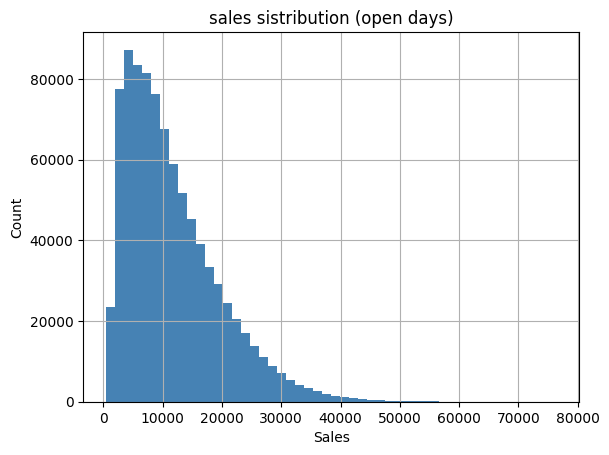

In [ ]:

df[df["Open"]==1]["Sales"].hist(bins=50, color="steelblue")
plt.title("sales sistribution (open days)")
plt.xlabel("Sales"); 
plt.ylabel("Count"); ``
plt.show()



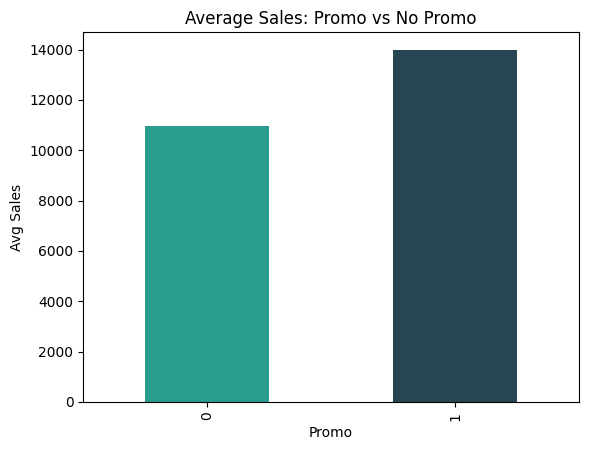

In [68]:

df[df["Open"]==1].groupby("Promo")["Sales"].mean().plot(kind="bar", color=["#2a9d8f","#264653"])
plt.title("Average Sales: Promo vs No Promo")
plt.ylabel("Avg Sales")
plt.show()


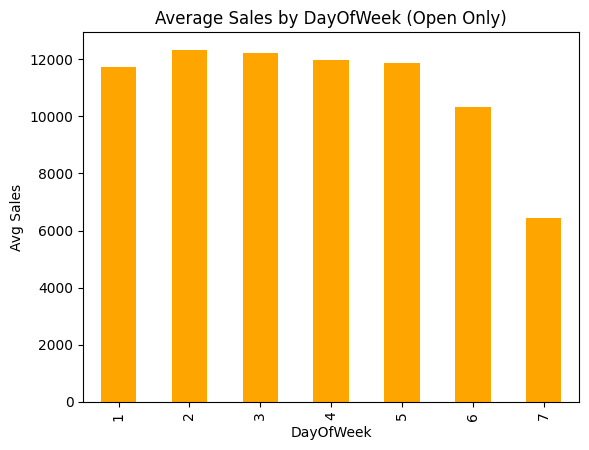

In [69]:

df[df["Open"]==1].groupby("DayOfWeek")["Sales"].mean().plot(kind="bar", color="orange")
plt.title("Average Sales by DayOfWeek (Open Only)")
plt.ylabel("Avg Sales")
plt.show()

In [ ]:
#drops extra columns in test data
test_full = test_full.reindex(columns=df.columns, fill_value=0)


y = df["Sales"]
drop_cols = {"Sales", "Id", "Date"}  
feature_cols = [c for c in df.columns if c not in drop_cols]

X = df[feature_cols]



In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("linear regression")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

linear regression
MAE: 2891.145633300281
R²: 0.7501436465848418


In [74]:

dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("decision tree")
print("MAE:", mean_absolute_error(y_test, dt_pred))
print("R² :", r2_score(y_test, dt_pred))

decision tree
MAE: 2385.4693371561034
R² : 0.8087050104245193


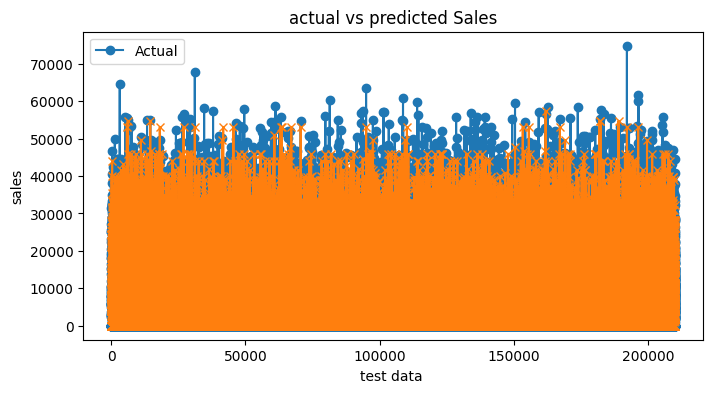

In [75]:


plt.figure(figsize=(8,4))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(dt_pred,marker='x')
plt.legend()
plt.title("actual vs predicted Sales")
plt.xlabel("test data ")
plt.ylabel("sales")
plt.show()


In [84]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval
0,1,a,a,2170.465839,6.0,2000.0,1,2014.0,51.0,"Jan,Apr,Jul,Oct"
1,2,a,a,727.245036,NaN,NaN,1,2015.0,12.0,"Jan,Apr,Jul,Oct"
2,3,d,c,3115.205782,5.0,1998.0,1,2012.0,21.0,"Mar,Jun,Sept,Dec"
3,4,a,b,854.124251,9.0,1991.0,0,2015.0,37.0,NaN
4,5,a,a,680.516577,4.0,1990.0,0,2011.0,52.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,c,a,400.602718,8.0,1994.0,1,2010.0,49.0,"Feb,May,Aug,Nov"
1111,1112,d,a,790.599721,3.0,2012.0,1,2015.0,37.0,"Jan,Apr,Jul,Oct"
1112,1113,b,a,2026.176917,9.0,2010.0,1,2014.0,24.0,NaN
1113,1114,b,b,1832.094244,4.0,1994.0,0,2015.0,40.0,NaN
